In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
tf.compat.v1.reset_default_graph()

df = pd.read_csv('house_data313.csv')

y = df['建物單價元/坪']
X = df.drop(['建物單價元/坪'], axis=1)

X = preprocessing.MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)



In [2]:
print(X_train.shape)
print(y_train.shape)

(50750, 48)
(50750,)


In [6]:
model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# # model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))

model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(2048, activation='relu'))

model.add(Dense(2048, activation='relu'))

model.add(Dense(2048, activation='relu'))

model.add(Dense(1024, activation='relu'))

model.add(Dense(512, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')



In [7]:
# model.summary()

In [8]:
r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=10,
              epochs=100)

Epoch 1/100
5075/5075 [==============================] - 269s 53ms/step - loss: 1.7218 - val_loss: 0.0898
Epoch 2/100
5075/5075 [==============================] - 251s 49ms/step - loss: 0.0862 - val_loss: 0.0834
Epoch 3/100
5075/5075 [==============================] - 286s 56ms/step - loss: 0.0773 - val_loss: 0.0901
Epoch 4/100
5075/5075 [==============================] - 322s 63ms/step - loss: 0.0742 - val_loss: 0.0719
Epoch 5/100
5075/5075 [==============================] - 229s 45ms/step - loss: 0.0718 - val_loss: 0.0715
Epoch 6/100
5075/5075 [==============================] - 285s 56ms/step - loss: 0.0691 - val_loss: 0.0798
Epoch 7/100
5075/5075 [==============================] - 299s 59ms/step - loss: 0.0677 - val_loss: 0.0705
Epoch 8/100
5075/5075 [==============================] - 255s 50ms/step - loss: 0.0678 - val_loss: 0.0698
Epoch 9/100
5075/5075 [==============================] - 268s 53ms/step - loss: 0.0655 - val_loss: 0.0679
Epoch 10/100
5075/5075 [======================

KeyboardInterrupt: 

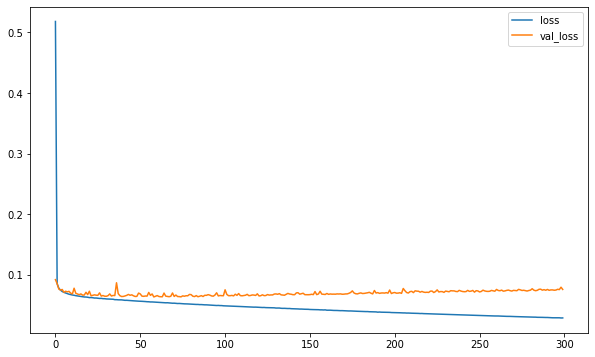

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [25]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square


test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('='*100)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.19686587358242164
MSE: 0.07610024851386686
RMSE: 0.2758627349133385
R2 Square 0.4006467630580396
Train set evaluation:
_____________________________________
MAE: 0.11459352656400953
MSE: 0.027030221449395597
RMSE: 0.16440870247464273
R2 Square 0.7860838597443969


In [16]:
# test_pred = model.predict(X_test)
# train_pred = model.predict(X_train)

# print('Test set evaluation:\n_____________________________________')
# print_evaluate(y_test, test_pred)

# print('Train set evaluation:\n_____________________________________')
# print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.18142489226719152
MSE: 0.06092811100447578
RMSE: 0.24683620278329468
R2 Square 0.511543127199973
Train set evaluation:
_____________________________________
MAE: 0.17497315063299293
MSE: 0.05715996551120045
RMSE: 0.2390815039086053
R2 Square 0.5510413124428906


In [9]:
result = model.evaluate(X_test, y_test)
print(result)

1348/1348 [==============================] - 40s 30ms/step - loss: 0.0170 0s - lo
0.01697719283401966


In [10]:
# #save model
# model.save_weights('Sequential_1.h5')
# model_json = model.to_json()
# with open('Sequential_1.json', "w") as json_file:
#     json_file.write(model_json)

In [ ]:
# Load Model
# from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras.layers import Dense, Dropout, Activation, LSTM
# import tensorflow as tf

# json_file = open('Sequential.json', 'r')
# loaded_model_json = json_file.read()
# model = tf.keras.models.model_from_json(loaded_model_json)
# model.load_weights('Sequential.h5')

In [44]:
model.save('Sequential_313_1.h5')

In [ ]:
# new_model = keras.models.load_model('dnn_mnist_model.h5')
# new_model.summary()